## **Análise exploratória e DataViz com Google Data Studio**

### *Sobre o conjunto de dados*

Fonte: [Kaggle]('https://www.kaggle.com/datasets/bhupeshsinghrathore/world-inflation-dataset-19602021?select=Data+set+for+inflation.csv')

Descrição: *Este é o conjunto de dados para a inflação mundial de 1960 a 2021, obtido do site do banco mundial para analisar a taxa de inflação em todo o mundo e nas principais economias.*


Fonte: [Kaggle]('https://www.kaggle.com/datasets/uddipta/world-bank-unemployment-data-19912017')


Fonte: [Kaggle]('https://www.kaggle.com/datasets/fredericksalazar/pib-gdp-global-by-countries-since-1960-to-2021')

### **Motivação**

## **Carregando bibliotecas**

In [1]:
# Bibliotecas nativas
import warnings

# Bibliotecas externas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import re
from datetime import datetime

In [2]:
# Configurando área de plotagem e warnings
warnings.filterwarnings('ignore')

sns.set(style = 'whitegrid', context = 'talk', font_scale = 0.8, rc = {'figure.figsize':(20,8)})

## **Carregando e visualizando bases de dados**

In [3]:
# Verificando dados no diretório
!pwd

/content


In [ ]:
!ls

sample_data


In [4]:
# Carregando dados de inflação

!wget 'https://raw.githubusercontent.com/Fagner608/inflacao_global/main/Data%20set%20for%20inflation.csv?token=GHSAT0AAAAAAB5WOSKFPVGCXDSB6FIRGSZIZAAALYA' -O 'inflacao.csv'

inflation_base = pd.read_csv('inflacao.csv')

--2023-03-08 01:32:17--  https://raw.githubusercontent.com/Fagner608/inflacao_global/main/Data%20set%20for%20inflation.csv?token=GHSAT0AAAAAAB5WOSKFPVGCXDSB6FIRGSZIZAAALYA
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150649 (147K) [text/plain]
Saving to: ‘inflacao.csv’

inflacao.csv        100%[===================>] 147.12K  --.-KB/s    in 0.03s   

2023-03-08 01:32:18 (4.93 MB/s) - ‘inflacao.csv’ saved [150649/150649]



In [5]:
# Carregando dados de desemprego

!wget 'https://raw.githubusercontent.com/Fagner608/inflacao_global/main/full_data.csv?token=GHSAT0AAAAAAB5WOSKEZRAXD3X2VAQO2EHSZAAAM5A' -O 'unployment.csv'

unployment_base = pd.read_csv('unployment.csv')

--2023-03-08 01:32:18--  https://raw.githubusercontent.com/Fagner608/inflacao_global/main/full_data.csv?token=GHSAT0AAAAAAB5WOSKEZRAXD3X2VAQO2EHSZAAAM5A
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110496 (108K) [text/plain]
Saving to: ‘unployment.csv’

unployment.csv      100%[===================>] 107.91K  --.-KB/s    in 0.02s   

2023-03-08 01:32:18 (4.24 MB/s) - ‘unployment.csv’ saved [110496/110496]



In [157]:
# Carregando dados do PIB

!wget 'https://raw.githubusercontent.com/Fagner608/inflacao_global/main/countries_gdp_hist.csv?token=GHSAT0AAAAAAB5WOSKFVHCYE6UEMJXVOE5QZAAANQA' -O 'pib.csv'

pib_base = pd.read_csv('pib.csv', sep = ';')

--2023-03-08 02:45:20--  https://raw.githubusercontent.com/Fagner608/inflacao_global/main/countries_gdp_hist.csv?token=GHSAT0AAAAAAB5WOSKFVHCYE6UEMJXVOE5QZAAANQA
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1586722 (1.5M) [text/plain]
Saving to: ‘pib.csv’

pib.csv             100%[===================>]   1.51M  --.-KB/s    in 0.08s   

2023-03-08 02:45:21 (18.1 MB/s) - ‘pib.csv’ saved [1586722/1586722]



### **Dicionários de dados**

  - inflation

|Coluna|Descrição|
|-------|---------|
|Country Name| Nome dos países|
|Country Code| Código(abreviação) dos países|
|Indicator Name| Indicador utilizado (preços ao consumidor)|
|Indicator Code | Código internacional do indicador utilizado|
|1960| Primeiro ano com dado de inflação|
|...|...|


  - unployment

|Coluna|Descrição|
|-------|---------|
|Country Name| Nome dos países|
|Region| A região do país|
|Income Group| A qual grupo de renda o país pertence|
|Special Notes| Qualquer nota especial sobre o país|
|Years(1991-2017| contém a taxa de desemprego desse ano em particular|

  - PIB


|Coluna|Descrição|
|-------|---------|
|Alpha 3 country code| Código dos países|
|region_name| Continente|
|sub_region_name| VERIFICAR|
|intermediate_region| VERIFICAR|
|country_name| Nome do país|
|income_groupe| Faixa de renda|
|year| Ano|
|total_gdp| Total do PIB|
|total_gdp_milion| Total em milhões|
|gdp_variation| Variação do PIB|


Verificamos que os dados estão dispostos em diferentes estruturas. Faremos o pré-processamento dos dados, deixando-os todos com o mesmo schema.

### *Esclarecimentos*

Verificando a necessidade de pré-processamento, e, estabelecidos os objetivos da análise, aplicaremos POO (programação orientada a objetos) à todas as fases da análise.

Foram criadas classes, com métodos e atributos específicos para este dataset, e, para o fluxo de trabalho, nesta ordem:

Pré-processamento > Análise exploratória e Data-wrangling > Machine Learning.

 - As classes herdam os atributos e métodos das criadas para a classe antecessora.

 - O fluxo acima poderá ser repetido quantas vezes forem necessário para se obter os resutados desejados.

### **Classe para pré-processamento dos dados**

In [7]:
# Classe para instanciar o DF
class data():

  def __init__(self, dataframe: pd.DataFrame) -> pd.DataFrame:

    if type(dataframe) == pd.DataFrame:
      
      self.__df = dataframe

    else:

      print('Dados não instanciados. Instancie um objeto do tipo pd.DataFrame')

  #definindo getter
  @property

  def dataframe(self):

    return self.__df
  
  #definindo setter
  @dataframe.setter

  def dataframe(self, df_2):

    if type(df_2) == pd.DataFrame:
      
      self.__df = df_2

    else:

      print('Dados não instanciados. Instancie um objeto do tipo pd.DataFrame')


In [8]:
# criando classe para verificar informações
class pre_processing(data):

  def __init__(self):
    pass

  def clean(self, char = False):

    self.dataframe.columns = [i.replace(" ","_") for i in self.dataframe.columns] #inserir método lower()

    if char is not None:

      self.dataframe.columns = [i.replace(f"{char}","_") for i in self.dataframe.columns]

    for coluna in self.dataframe.select_dtypes('object').columns:
        
            if char is not None:

              self.dataframe[coluna] = self.dataframe[coluna].apply(lambda x: str(x).replace(f"{char}", "_"))

            self.dataframe[coluna] = self.dataframe[coluna].apply(lambda x: str(x).replace(" ", "_"))
        
            self.dataframe[coluna] = self.dataframe[coluna].apply(lambda x: str(x).lower())
        
            self.dataframe[coluna] = self.dataframe[coluna].apply(lambda x: re.sub(r'[áàãâä]', 'a', x))
        
            self.dataframe[coluna] = self.dataframe[coluna].apply(lambda x: re.sub(r'[éèêë]', 'e', x))
        
            self.dataframe[coluna] = self.dataframe[coluna].apply(lambda x: re.sub(r'[íìîï]', 'i', x))
        
            self.dataframe[coluna] = self.dataframe[coluna].apply(lambda x: re.sub(r'[óòõôö]', 'o', x))
        
            self.dataframe[coluna] = self.dataframe[coluna].apply(lambda x: re.sub(r'[úùûü]', 'u', x))
        
            self.dataframe[coluna] = self.dataframe[coluna].apply(lambda x: re.sub(r'[ç]', 'c', x))

            self.dataframe[coluna] = self.dataframe[coluna].apply(lambda x: re.sub(r"['’]", '', x))


### Classe para datawrangling

In [9]:
class data_wrangling(pre_processing):

  def __init__(self):

    pass

  #realizando pivot dos dados
  def larg_long(self, dados:pd.DataFrame, id_vars = [], var_name = str, value_name = str, sort_values=[]):

    return pd.melt(frame=dados, id_vars=id_vars,
            var_name=var_name, value_name=value_name).sort_values(by  = sort_values).reset_index(drop = True)

  #atribuindo novo tipo aos dados - (preciso fazer classe para analisar e tratar nas antes de fazer conversoes)
  def set_attributes(self, atributo: list = str, tipo: list = type):

    for attr,tp in zip(atributo, tipo):
      
      self.dataframe[attr] = self.dataframe[attr].apply(lambda x: tp(x))


  #tratando nan
  def calculate_nan(self):

    nrow = self.dataframe.shape[0]

    result = []

    for col in self.dataframe.columns:

      result.append([str(col), self.dataframe[col].isnull().sum(), str(round((self.dataframe[col].isnull().sum()/nrow),2)*100)+'%'])

    return pd.DataFrame(result, columns = ['atributos', 'frequencia_nan', 'nan_%']).set_index(['atributos'])


    #info char
  def info_char(self):

      dados1 = self.calculate_nan()
      
      dados2 = self.dataframe.select_dtypes('object').describe().T

      return pd.concat([dados1, dados2], axis = 1, join = 'inner')


    #info number
  def info_number(self):

      dados1 = self.calculate_nan()
      
      dados2 = self.dataframe.describe().T

      return pd.concat([dados1, dados2], axis = 1, join = 'inner')


  #eliminando nan's
  def drop_na(self):

    self.dataframe.dropna(inplace = True)
    self.dataframe.reset_index(drop=True, inplace=True)

  #drop values
  def drop_values(self, atributo: str, values: list = str):

    for value in values:
      
      self.dataframe = self.dataframe.query(f'{atributo} != {value}').reset_index(drop=True)


  #defindo atributos
  def attr(self):

    setattr(self, 'char_attr', list(self.dataframe.select_dtypes('object').columns))

    setattr(self, 'number_attr', list(self.dataframe.select_dtypes(['int', 'float']).columns))

  # Elementos dos atributos
  def attr_element(self, elemento: list = ['-', '*', '/', '^']):

    item = elemento

    dado = {}

    for col in self.dataframe.columns:

      dado[col] = self.dataframe[col].apply(lambda x: x if x in item else None)

    return pd.DataFrame(dado).drop_duplicates().reset_index(drop = True)


  #drop columns
  def drop_columns(self, drop:list = str):

    self.dataframe.drop(drop, axis = 1, inplace = True)


  #drop outliers (por atributo)
  def drop_outliers(self, atributos:list = None):

    cols = self.number_attr

    if atributos is not None:

        cols = atributos

    for col in cols:

      desvio = self.dataframe[col].std()

      limite_superior = self.dataframe[col].mean() + 3 * desvio

      limite_inferior = self.dataframe[col].mean() - 3 * desvio,

      return self.dataframe.query(f'@limite_inferior <= {col} <= @limite_superior').reset_index(drop = True)
      



Classe para visualização de dados

In [10]:
#classe para visualização de dados
class dataviz(data_wrangling):

  def __init__(self):
    pass

  def hist(self, col = str, hue: str = None, kde = None, dist_norm: bool = False):
    
        hist_graph = sns.histplot(self.dataframe[col], hue=hue, kde=kde)

        hist_graph.set(title=f'Distribuição de frequências do atributo {col}', xlabel=f'{col}')

        if dist_norm:
            # Gerar a curva de densidade da distribuição normal
            min_val = min(self.dataframe[col])

            max_val = max(self.dataframe[col])

            length = len(self.dataframe[col])

            range_val = np.random.normal(min_val, max_val, size=length)

            density = gaussian_kde(range_val)

            x_vals = np.linspace(min_val, max_val, 100)

            y_vals = density(x_vals)

            # Plotar a curva de densidade sobre o histograma
            ax = hist_graph.twinx()

            ax.plot(x_vals, y_vals, 'r-')

            ax.set_ylabel('Densidade')

            ax.grid(False)

        plt.show()
      

  def bar(self, x: str, y: str, label:str = None):
    
    bar_graph = sns.barplot(self.dataframe, x = x, y = y, label = label)


  def rosca(self):
    pass

  def boxplot(self, x = str, y: str = None, hue: str= None):
    
    box_graph = sns.boxplot(data = self.dataframe, x = x, y = y, hue = hue)
    sns.despine(offset=10, trim=True)

  def cor_matrx(self):
    pass


  def scatter_plot(self, x = str, y = str, hue: str = None, size: str = None):
    
    sccater_graph = sns.relplot(self.dataframe, x = x, y = y, hue= hue, size = size)
    
    sccater_graph.set(title = f'Relação entre {x} e {y}', xlabel = f'{x}', ylabel = f'{y}')

    sccater_graph.set(xscale = 'log', yscale = 'loh')

    sccater_graph.despine(left=True, bottom=True)
    
    if hue is not None:

      sccater_graph.get().set_title(f'{hue}')



Classe para série temporal

In [ ]:
#classe para série temporal

class temporal_series(dataviz):

  def __init__(self):
    pass

Classe para machine learning

In [ ]:
#classe para machine learning
class ml(dataviz):

  def __init__(self):
    pass

  def cor_data(self):
    pass
    #para verificar a correlação entre os dados

Classe para exportação de dados (visualizaçõ iterativa)

In [ ]:
#classe para exportação de dados
class export(ml):

  def __init__(self):
    pass

Primeira etapa: instanciar e tratar os dados, deixá-los todos no mesmo shape.

inflation

In [82]:
#criando função para automatizar a aplicação das classes
inflation = data_wrangling()

def instance_inflation():
  
  inflation.dataframe = inflation_base

  inflation.clean()

  #redefinindo base de dados
  inflation.dataframe = inflation.larg_long(dados=inflation.dataframe, id_vars = ['Country_Name', 'Country_Code', 'Indicator_Name', 'Indicator_Code'],
                                 var_name = 'year', value_name = 'variacao', sort_values = ['Country_Name', 'year'])
  
  inflation.clean(char = '%')

#chamando função

instance_inflation()

In [83]:
#Conferindo resultado
inflation.dataframe.head()

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,year,variacao
0,afghanistan,afg,"inflation,_consumer_prices_(annual__)",fp.cpi.totl.zg,1960,NaN
1,afghanistan,afg,"inflation,_consumer_prices_(annual__)",fp.cpi.totl.zg,1961,NaN
2,afghanistan,afg,"inflation,_consumer_prices_(annual__)",fp.cpi.totl.zg,1962,NaN
3,afghanistan,afg,"inflation,_consumer_prices_(annual__)",fp.cpi.totl.zg,1963,NaN
4,afghanistan,afg,"inflation,_consumer_prices_(annual__)",fp.cpi.totl.zg,1964,NaN


Unployment

In [84]:
#Criando função para automatizar a aplicação dos métodos
unployment = data_wrangling()

def instance_unployment(): 
  
  unployment.dataframe = unployment_base

  unployment.clean()

  unployment.dataframe = unployment.larg_long(dados=unployment.dataframe, id_vars = ['Country_Name', 'Region', 'IncomeGroup', 'SpecialNotes'],
                                 var_name = 'year', value_name = 'variacao', sort_values = ['Country_Name', 'year'])
  
instance_unployment()

In [85]:
#Verificando resultado
unployment.dataframe.head()

,Country_Name,Region,IncomeGroup,SpecialNotes,year,variacao
0,afghanistan,south_asia,low_income,fiscal_year_end:_march_20;_reporting_period_fo...,1991,1.3
1,afghanistan,south_asia,low_income,fiscal_year_end:_march_20;_reporting_period_fo...,1992,0.8
2,afghanistan,south_asia,low_income,fiscal_year_end:_march_20;_reporting_period_fo...,1993,0.7
3,afghanistan,south_asia,low_income,fiscal_year_end:_march_20;_reporting_period_fo...,1994,0.6
4,afghanistan,south_asia,low_income,fiscal_year_end:_march_20;_reporting_period_fo...,1995,1.8


PIB

In [158]:
pib = data_wrangling()

#Criando classe par automatizar a aplicação dos métodos
def instance_pib():
  
  pib.dataframe = pib_base

  pib.clean()

instance_pib()

In [159]:
#Visualizando o resultado
pib.dataframe.head()

,country_code,region_name,sub_region_name,intermediate_region,country_name,income_group,year,total_gdp,total_gdp_million,gdp_variation
0,abw,americas,latin_america_and_the_caribbean,caribbean,aruba,ingreso_alto,1960,0.0,0.0,0.0
1,abw,americas,latin_america_and_the_caribbean,caribbean,aruba,ingreso_alto,1961,0.0,0.0,0.0
2,abw,americas,latin_america_and_the_caribbean,caribbean,aruba,ingreso_alto,1962,0.0,0.0,0.0
3,abw,americas,latin_america_and_the_caribbean,caribbean,aruba,ingreso_alto,1963,0.0,0.0,0.0
4,abw,americas,latin_america_and_the_caribbean,caribbean,aruba,ingreso_alto,1964,0.0,0.0,0.0


Agora, temos os 3 dataset (inflation, unployment e pib), todos com as mesmas características e mesmo shape.

Vamos verificar quais atributos nos interessam, para os fins desta pesquisa, e descartar o resto, seguindo a mesma ordem

Inflation

In [88]:
#Visualizando inflation
inflation.dataframe.head()

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,year,variacao
0,afghanistan,afg,"inflation,_consumer_prices_(annual__)",fp.cpi.totl.zg,1960,NaN
1,afghanistan,afg,"inflation,_consumer_prices_(annual__)",fp.cpi.totl.zg,1961,NaN
2,afghanistan,afg,"inflation,_consumer_prices_(annual__)",fp.cpi.totl.zg,1962,NaN
3,afghanistan,afg,"inflation,_consumer_prices_(annual__)",fp.cpi.totl.zg,1963,NaN
4,afghanistan,afg,"inflation,_consumer_prices_(annual__)",fp.cpi.totl.zg,1964,NaN


In [89]:
#Verificando dimensões

inflation.dataframe.shape

(16492, 6)

Percebe-se que temos dados nulos extamente no atributo 'variacao', que registra a inflação no ano em questão. Trataremos isso no momento oportuno, verificando o impacto destes dados no dataset.

In [90]:
#Verificando shape dos dados

inflation.dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country_Name    16492 non-null  object 
 1   Country_Code    16492 non-null  object 
 2   Indicator_Name  16492 non-null  object 
 3   Indicator_Code  16492 non-null  object 
 4   year            16492 non-null  object 
 5   variacao        10489 non-null  float64
dtypes: float64(1), object(5)
memory usage: 773.2+ KB


Verifica-se a necessidade de adequar o atributo 'year', para o tipo de dado correto.

In [91]:
# Definindo tipo datetime para coluna 'year'
inflation.dataframe['year'] = inflation.dataframe['year'].apply(lambda date: datetime.strptime(date, "%Y").date().year)

In [92]:
# Definindo dados
inflation.dataframe = inflation.dataframe.query('year >= 1990')

In [93]:
#Visualizando informações básicas sobre os dados
inflation.info_char()

,frequencia_nan,nan_%,count,unique,top,freq
Country_Name,0,0.0%,8512,266,afghanistan,32
Country_Code,0,0.0%,8512,266,afg,32
Indicator_Name,0,0.0%,8512,1,"inflation,_consumer_prices_(annual__)",8512
Indicator_Code,0,0.0%,8512,1,fp.cpi.totl.zg,8512


Percebe-se que os atributos em questão não possuem dados nulos. Temos 266 países, possivelmente, todos com o respectivo código.

Verifica-se que, a inflação foi medidada pela seguinte taxa (anual):

  - inflatio consumer prices (code = fp.cpi.toti.zg)

Possuindo a mesma taxa, evitaremos maior manipulação dos dados, e, sabendo deste detalhe, podemos eliminar, antes de seguirmos, os atributos 'Indicator_Name' e 'Indicator_Code'

In [94]:
#Elimimando colunas desnecessárias
inflation.drop_columns(drop = ['Indicator_Name', 'Indicator_Code'])

In [95]:
inflation.info_char()

,frequencia_nan,nan_%,count,unique,top,freq
Country_Name,0,0.0%,8512,266,afghanistan,32
Country_Code,0,0.0%,8512,266,afg,32


In [96]:
#Verificando dados numéricos
inflation.info_number()

,frequencia_nan,nan_%,count,mean,std,min,25%,50%,75%,max
year,0,0.0%,8512.0,2005.500000,9.233635,1990.00000,1997.75000,2005.500000,2013.250000,2021.00000
variacao,1622,19.0%,6890.0,21.343291,330.991403,-18.10863,2.02753,4.019139,7.797498,23773.13177


Quanto a variação, observamos, inicialmente, uma possível assimetria à direita, conforme evidenciam a média aritmética e mediada (certamente, provocada pelo fato de que a maioria dos países do mundo mantém inflação próxima à 0. Vamos tratar melhor esta assimetria na análise descritiva.

Verificamos, também, que existem dados nulos, e, que comprometem parte significante dos dados (36%). Certamente se referem à anos em que não houve medição.

In [97]:
#Verificando dados com NaN
nan_datas = inflation.dataframe[inflation.dataframe['variacao'].isnull()]

nan_datas

,Country_Name,Country_Code,year,variacao
30,afghanistan,afg,1990,NaN
31,afghanistan,afg,1991,NaN
32,afghanistan,afg,1992,NaN
33,afghanistan,afg,1993,NaN
34,afghanistan,afg,1994,NaN
...,...,...,...,...
16475,zimbabwe,zwe,2005,NaN
16476,zimbabwe,zwe,2006,NaN
16477,zimbabwe,zwe,2007,NaN
16478,zimbabwe,zwe,2008,NaN


In [98]:
nan_datas[['Country_Code']].groupby(by = 'Country_Code').agg(sum)

""
Country_Code
abw
afg
ago
alb
and
...
vir
vnm
xkx


In [99]:
nan_datas['year'].min()

1990

In [100]:
nan_datas['year'].max()

2021

119 paises possuem dados NaN em algum momento, desde 1990.

Unployment

In [101]:
unployment.dataframe.head()

,Country_Name,Region,IncomeGroup,SpecialNotes,year,variacao
0,afghanistan,south_asia,low_income,fiscal_year_end:_march_20;_reporting_period_fo...,1991,1.3
1,afghanistan,south_asia,low_income,fiscal_year_end:_march_20;_reporting_period_fo...,1992,0.8
2,afghanistan,south_asia,low_income,fiscal_year_end:_march_20;_reporting_period_fo...,1993,0.7
3,afghanistan,south_asia,low_income,fiscal_year_end:_march_20;_reporting_period_fo...,1994,0.6
4,afghanistan,south_asia,low_income,fiscal_year_end:_march_20;_reporting_period_fo...,1995,1.8


Temos o atributo "Country_Name" em comum com o dataset anterior, e temos uma nova, "Region"; pode ser interessante manter no dataset.

As colunas "IncomeGroup" e 'SpecialNote' não nos interessam no momento.

Vamos descartar estas colunas, antes de prosseguir.

In [102]:
# Descartando atributos não utilizados

unployment.drop_columns(drop = ['IncomeGroup', 'SpecialNotes'])

In [103]:
# Verificando dimensões

unployment.dataframe.shape

(6264, 4)

In [104]:
# verificando características dos dados do tipo char

unployment.info_char()

,frequencia_nan,nan_%,count,unique,top,freq
Country_Name,0,0.0%,6264,232,afghanistan,27
Region,0,0.0%,6264,8,europe_&_central_asia,1323
year,0,0.0%,6264,27,1991,232


O atributo 'year' está como string, precisamos adequar o tipo deste dado.

In [105]:
#atribuindo tipo 'date'

unployment.dataframe['year'] = unployment.dataframe['year'].apply(lambda date: datetime.strptime(date, '%Y').date().year)

In [106]:
# Verificando características dos dados numéricos
unployment.info_number()

,frequencia_nan,nan_%,count,mean,std,min,25%,50%,75%,max
year,0,0.0%,6264.0,2004.000000,7.789503,1991.0,1997.0,2004.000000,2011.0,2017.000000
variacao,0,0.0%,6264.0,8.869434,5.948052,0.1,5.1,7.249009,11.4,39.299999


Não temos dados NaN no dataset unployment.

In [107]:
min(unployment.dataframe['year'])

1991

In [108]:
max(unployment.dataframe['year'])

2017

Verifica-se que, os ___ minimo e máximo deste dataset é menor do que o dataset de inflação.

PIB

In [160]:
pib.dataframe.head()

,country_code,region_name,sub_region_name,intermediate_region,country_name,income_group,year,total_gdp,total_gdp_million,gdp_variation
0,abw,americas,latin_america_and_the_caribbean,caribbean,aruba,ingreso_alto,1960,0.0,0.0,0.0
1,abw,americas,latin_america_and_the_caribbean,caribbean,aruba,ingreso_alto,1961,0.0,0.0,0.0
2,abw,americas,latin_america_and_the_caribbean,caribbean,aruba,ingreso_alto,1962,0.0,0.0,0.0
3,abw,americas,latin_america_and_the_caribbean,caribbean,aruba,ingreso_alto,1963,0.0,0.0,0.0
4,abw,americas,latin_america_and_the_caribbean,caribbean,aruba,ingreso_alto,1964,0.0,0.0,0.0


Vamos eliminar os atributos 'sub_region_name', 'income_group', 'gdp_variation' e 'total_gdp', para o valor do PIB, ficaremos com 'total_gfp_million'. Os demais dados estão em sua forma absoluta, manteremos esse padrão até realizar o merge das tabelas.

In [161]:
# Eliminando atributos não usados
pib.drop_columns(drop = ['sub_region_name', 'income_group', 'gdp_variation', 'total_gdp'])

In [162]:
pib.dataframe.shape

(13330, 6)

In [163]:
pib.info_char()

,frequencia_nan,nan_%,count,unique,top,freq
country_code,0,0.0%,13330,215,abw,62
region_name,0,0.0%,13330,5,africa,3348
intermediate_region,0,0.0%,13330,8,no_data,7750
country_name,0,0.0%,13330,215,aruba,62


In [164]:
pib.info_number()

,frequencia_nan,nan_%,count,mean,std,min,25%,50%,75%,max
year,0,0.0%,13330.0,1990.500000,17.896201,1960.0,1975.000000,1990.500000,2006.00000,2021.00
total_gdp_million,0,0.0%,13330.0,142938.595088,876997.888412,0.0,115.223767,3189.442766,27463.23824,23315080.56


Não temos dados Nan nos, neste dataset.

In [165]:
pib.dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13330 entries, 0 to 13329
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_code         13330 non-null  object 
 1   region_name          13330 non-null  object 
 2   intermediate_region  13330 non-null  object 
 3   country_name         13330 non-null  object 
 4   year                 13330 non-null  int64  
 5   total_gdp_million    13330 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 625.0+ KB


Vamos atribuir o tipo correto a coluna data

In [166]:
#atribuindo tipo correto

pib.dataframe['year'] = pib.dataframe['year'].apply(lambda date: datetime.strptime(str(date), '%Y').date().year)

In [167]:
# Definindo dados
pib.dataframe = pib.dataframe.query('year >= 1990')

In [115]:
min(pib.dataframe['year'])

1990

In [116]:
max(pib.dataframe['year'])

2021

In [168]:
pib.dataframe.head()

,country_code,region_name,intermediate_region,country_name,year,total_gdp_million
30,abw,americas,caribbean,aruba,1990,764.804469
31,abw,americas,caribbean,aruba,1991,872.067039
32,abw,americas,caribbean,aruba,1992,958.659218
33,abw,americas,caribbean,aruba,1993,1083.240223
34,abw,americas,caribbean,aruba,1994,1245.810056


In [118]:
#verificando como region_name estão listados

pib.dataframe[['region_name']].groupby(by = 'region_name').agg(sum)

""
region_name
africa
americas
asia
europe
oceania


In [119]:
#verificando como os intermediate_region estão listados

pib.dataframe[['intermediate_region']].groupby(by = 'intermediate_region').agg(sum)

""
intermediate_region
caribbean
central_america
eastern_africa
middle_africa
no_data
south_america
southern_africa
western_africa


Vamos eliminar estes dados, visto que não agregarão valor a análise

In [169]:
#eliminando dados

pib.drop_columns(drop = ['intermediate_region'])

In [121]:
pib.dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6880 entries, 30 to 13329
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country_code       6880 non-null   object 
 1   region_name        6880 non-null   object 
 2   country_name       6880 non-null   object 
 3   year               6880 non-null   int64  
 4   total_gdp          6880 non-null   float64
 5   total_gdp_million  6880 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 376.2+ KB


Observamos, acima, nem todos os dataset possuem os mesmos países. Vamos realizar o merge, utilizando o 'country_code' dos dados. Para isso, vamos verificar se os atributos possuem o mesmo label, para facilitar o procedimento.

In [170]:
# verificando labels

print(inflation.dataframe.columns)
print(unployment.dataframe.columns)
print(pib.dataframe.columns)

Index(['Country_Name', 'Country_Code', 'year', 'variacao'], dtype='object')
Index(['Country_Name', 'Region', 'year', 'variacao'], dtype='object')
Index(['country_code', 'region_name', 'country_name', 'year',
       'total_gdp_million'],
      dtype='object')


Observamos que o dataset unploymente não possui o 'country_code', apenas o 'country_name'. Vamos utilizar o 'country_name', fazendo o ajuste necessário.

In [175]:
#fazendo ajuste
pib.dataframe.columns = ['Country_code', 'region_name', 'Country_Name', 'year',
       'total_gdp_million']

In [147]:
# Realizando o merge (inflation +unplyment)

df1 = pd.merge(inflation.dataframe, unployment.dataframe, how = 'inner', on = ['Country_Name', 'year'])

In [148]:
#verifica-se necessida de agregar por pais, depois data e sumarizar a taxa

df1.head()

,Country_Name,Country_Code,year,variacao_x,Region,variacao_y
0,afghanistan,afg,1991,NaN,south_asia,1.3
1,afghanistan,afg,1992,NaN,south_asia,0.8
2,afghanistan,afg,1993,NaN,south_asia,0.7
3,afghanistan,afg,1994,NaN,south_asia,0.6
4,afghanistan,afg,1995,NaN,south_asia,1.8


In [149]:
df1.shape

(6183, 6)

In [150]:
df1.columns

Index(['Country_Name', 'Country_Code', 'year', 'variacao_x', 'Region',
       'variacao_y'],
      dtype='object')

In [151]:
df1.columns = ['Country_Name', 'Country_Code', 'year', 'inflation', 'Region',
       'unployment_rate']

In [152]:
df1.head()

,Country_Name,Country_Code,year,inflation,Region,unployment_rate
0,afghanistan,afg,1991,NaN,south_asia,1.3
1,afghanistan,afg,1992,NaN,south_asia,0.8
2,afghanistan,afg,1993,NaN,south_asia,0.7
3,afghanistan,afg,1994,NaN,south_asia,0.6
4,afghanistan,afg,1995,NaN,south_asia,1.8


In [177]:
# Fazendo merge em df1 + pib

df2 = pd.merge(df1, pib.dataframe, how = 'inner', on = ['Country_Name', 'year'])

In [180]:
df2.tail()

,Country_Name,Country_Code,year,inflation,Region,unployment_rate,Country_code,region_name,total_gdp_million
4234,zimbabwe,zwe,2013,1.634950,sub-saharan_africa,5.2,zwe,africa,19091.019990
4235,zimbabwe,zwe,2014,-0.197785,sub-saharan_africa,5.1,zwe,africa,19495.519630
4236,zimbabwe,zwe,2015,-2.430968,sub-saharan_africa,5.1,zwe,africa,19963.120610
4237,zimbabwe,zwe,2016,-1.543670,sub-saharan_africa,5.2,zwe,africa,20548.678070
4238,zimbabwe,zwe,2017,0.893962,sub-saharan_africa,5.3,zwe,africa,17584.890937


Vamos instanciar o novo dataset na nossa classe

In [230]:
# instanciando dados
dataset = data_wrangling()

dataset.dataframe = df2

In [231]:
dataset.dataframe.shape

(3629, 9)

In [183]:
dataset.info_char()

,frequencia_nan,nan_%,count,unique,top,freq
Country_Name,0,0.0%,4239,157,afghanistan,27
Country_Code,0,0.0%,4239,157,afg,27
Region,0,0.0%,4239,7,europe_&_central_asia,1107
Country_code,0,0.0%,4239,157,afg,27
region_name,0,0.0%,4239,5,africa,1242


In [184]:
dataset.info_number()

,frequencia_nan,nan_%,count,mean,std,min,25%,50%,75%,max
year,0,0.0%,4239.0,2004.000000,7.789800,1991.00000,1997.000000,2004.000000,2011.000000,2.017000e+03
inflation,610,14.000000000000002%,3629.0,20.512849,160.505783,-18.10863,1.894635,4.183568,8.825389,4.734914e+03
unployment_rate,0,0.0%,4239.0,8.809483,5.991968,0.10000,4.700000,7.200000,11.600000,3.930000e+01
total_gdp_million,0,0.0%,4239.0,203481.343776,701557.527744,0.00000,3986.604589,16350.804543,100064.757556,1.231041e+07


In [232]:
#Eliminando Nan

dataset.drop_na()

In [212]:
dataset.info_number()

,frequencia_nan,nan_%,count,mean,std,min,25%,50%,75%,max
inflation,0,0.0%,3629.0,20.512849,160.505783,-18.10863,1.894635,4.183568,8.825389,4.734914e+03
unployment_rate,0,0.0%,3629.0,8.565665,5.945603,0.10000,4.500000,6.900000,11.200000,3.760000e+01
total_gdp_million,0,0.0%,3629.0,232600.562010,753586.123513,0.00000,5349.258334,20979.767785,132223.268491,1.231041e+07


In [235]:
dataset.dataframe = dataset.dataframe.query("year > 2000").reset_index(drop = True)

In [236]:
# Definindo indice como coluna de data

# ANTES DE TORNAR O ANO EM INDICE, PRECISO PADRONIZAR AS DATAS PARA > 2000


dataset.dataframe = dataset.dataframe.set_index(['year'], drop = True)

In [237]:
dataset.clean()

In [238]:
dataset.dataframe.head()

,Country_Name,Country_Code,inflation,Region,unployment_rate,Country_code,region_name,total_gdp_million
year,,,,,,,,
2005,afghanistan,afg,12.686269,south_asia,8.5,afg,asia,6226.199249
2006,afghanistan,afg,6.784597,south_asia,8.4,afg,asia,6971.379033
2007,afghanistan,afg,8.680571,south_asia,8.3,afg,asia,9715.761650
2008,afghanistan,afg,26.418664,south_asia,8.2,afg,asia,10249.767311
2009,afghanistan,afg,-6.811161,south_asia,8.2,afg,asia,12154.835708


In [239]:
dataset.dataframe.tail()

,Country_Name,Country_Code,inflation,Region,unployment_rate,Country_code,region_name,total_gdp_million
year,,,,,,,,
2013,zimbabwe,zwe,1.634950,sub-saharan_africa,5.2,zwe,africa,19091.019990
2014,zimbabwe,zwe,-0.197785,sub-saharan_africa,5.1,zwe,africa,19495.519630
2015,zimbabwe,zwe,-2.430968,sub-saharan_africa,5.1,zwe,africa,19963.120610
2016,zimbabwe,zwe,-1.543670,sub-saharan_africa,5.2,zwe,africa,20548.678070
2017,zimbabwe,zwe,0.893962,sub-saharan_africa,5.3,zwe,africa,17584.890937


In [240]:
dataset.drop_columns(drop=['Country_code'])

In [241]:
dataset.dataframe.columns

Index(['Country_Name', 'Country_Code', 'inflation', 'Region',
       'unployment_rate', 'region_name', 'total_gdp_million'],
      dtype='object')

In [242]:
# Reorganizando atributos

dataset.dataframe = dataset.dataframe[['Country_Name', 'Country_Code', 'region_name', 'Region', 'inflation', 'unployment_rate', 'total_gdp_million']]

In [243]:
dataset.dataframe.head()

,Country_Name,Country_Code,region_name,Region,inflation,unployment_rate,total_gdp_million
year,,,,,,,
2005,afghanistan,afg,asia,south_asia,12.686269,8.5,6226.199249
2006,afghanistan,afg,asia,south_asia,6.784597,8.4,6971.379033
2007,afghanistan,afg,asia,south_asia,8.680571,8.3,9715.761650
2008,afghanistan,afg,asia,south_asia,26.418664,8.2,10249.767311
2009,afghanistan,afg,asia,south_asia,-6.811161,8.2,12154.835708


In [244]:
data = dataset.dataframe.query('Country_Name == "brazil"')

<AxesSubplot:xlabel='year', ylabel='inflation'>

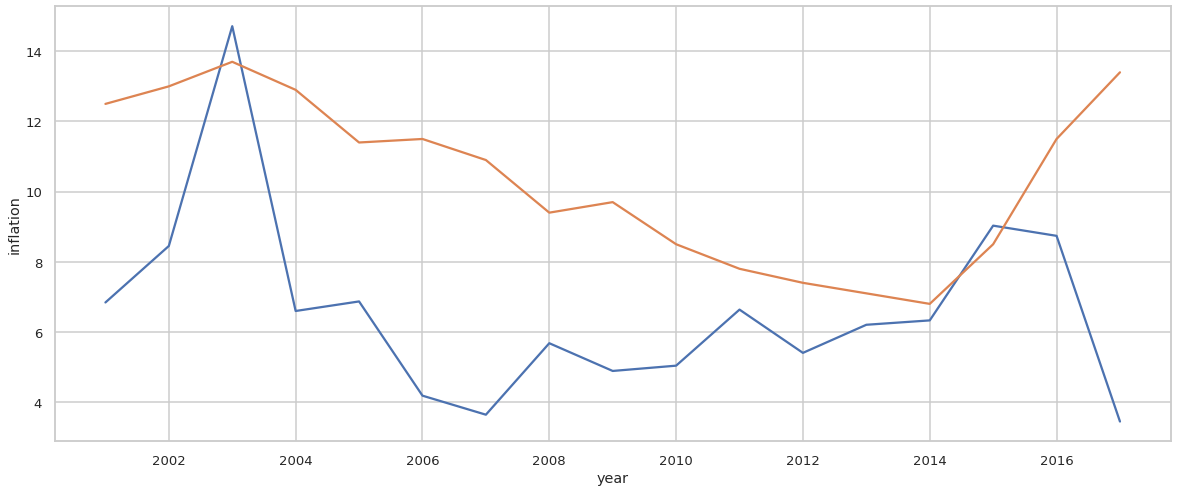

In [248]:
#OS DADOS PRECISAM SER COLOCADOS NA MESMA ESCALA

sns.lineplot(data = data, y = 'inflation', x = data.index)
sns.lineplot(data = data, y = 'unployment_rate', x = data.index)

EM ANDAMENTO